# 円グラフ

## 概要

**円グラフ（Pie Chart）** とは，主に質的変数に対して，その比率を **扇形の角度** で表したグラフです．
**扇形グラフ** とも呼ばれます．
質的変数の比率を可視化する際に最もよく用いられるグラフの一つです．
それぞれの要素が全体に対してどの程度占めるか直感的にわかりやすいという長所がありますが，一方で要素同士の比率の比較がしづらいという短所もあります．

![](../figs/charts/pie.png)

例えば上図は，雑誌ごとの合計作品数の比率を表した円グラフです．
各雑誌がおおよそ1/4程度を占めているということ，特に`週刊少年ジャンプ`が多いということはわかりますが，雑誌ごとの比較は難しいです．
例えば，（数値を見ずに）`週刊少年マガジン`と`週刊少年サンデー`のどちらが多いかわかりますか？

## Plotlyによる作図方法

Plotlyでは，`plotly.express.pie()`でヒストグラムを作成可能です．

```python
import plotly.express as px
fig = px.strip(df, values='col_val', names='col_name')
```

上記の例では，`df`の`col_val`列の量を基準に，`col_name`列を凡例名とした円グラフのオブジェクト`fig`を作成します．

## MADB Labを用いた作図例

### 下準備

In [5]:
import pandas as pd
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [6]:
# 前処理の結果，以下に分析対象ファイルが格納されていることを想定
PATH_DATA = '../../data/preprocess/out/episodes.csv'
# Jupyter Book用のPlotlyのrenderer
RENDERER = 'plotly_mimetype+notebook'

In [7]:
def show_fig(fig):
    """Jupyter Bookでも表示可能なようRendererを指定"""
    fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
    fig.show(renderer=RENDERER)

In [8]:
df = pd.read_csv(PATH_DATA)

### 雑誌別の合計作品数

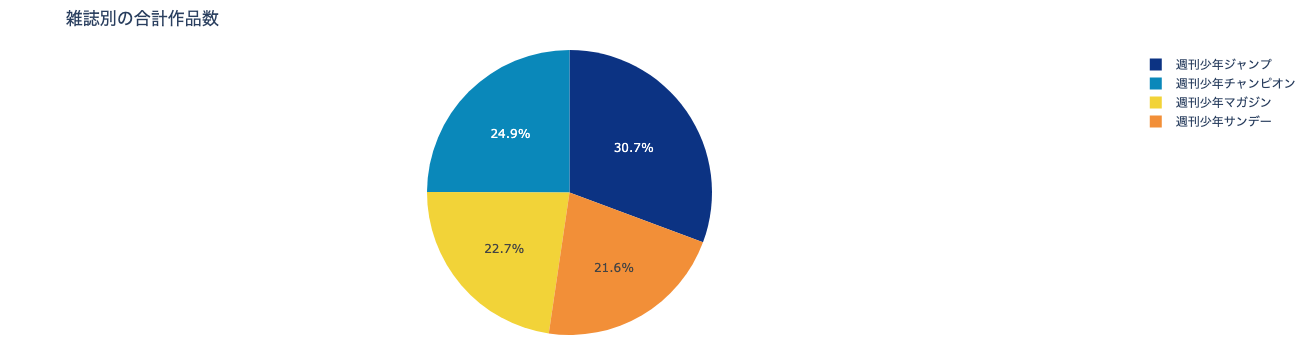

In [10]:
df_plot = \
    df.groupby('mcname')['cname'].nunique().reset_index()
df_plot = \
    df_plot.sort_values(
    'cname', ascending=False, ignore_index=True)
fig = px.pie(
    df_plot, values='cname', names='mcname',
    color_discrete_sequence= px.colors.diverging.Portland,
    title='雑誌別の合計作品数')
show_fig(fig)

### 雑誌別の合計作者数

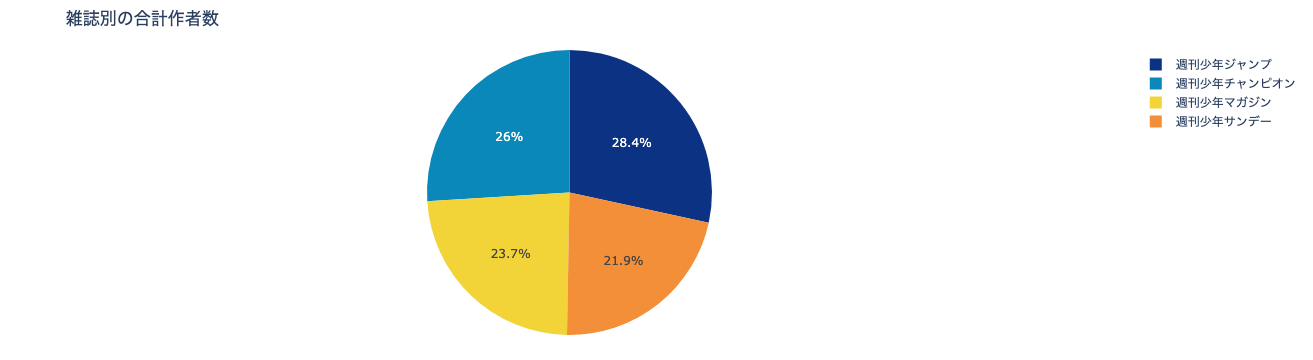

In [12]:
df_plot = \
    df.groupby('mcname')['creator'].nunique().reset_index()
df_plot = \
    df_plot.sort_values(
    'creator', ascending=False, ignore_index=True)
fig = px.pie(
    df_plot, values='creator', names='mcname',
    color_discrete_sequence= px.colors.diverging.Portland,
    title='雑誌別の合計作者数')
show_fig(fig)